<a href="https://colab.research.google.com/github/nyjinnn/images/blob/main/Chapter4-5_Logistic_Regression_pytorch(220623_%EC%A7%84%EC%A7%9C%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

## 문제 해결을 위한 데이터셋 준비

1. 데이터셋 불러오기 


In [145]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


2. 데이터 확인하기 

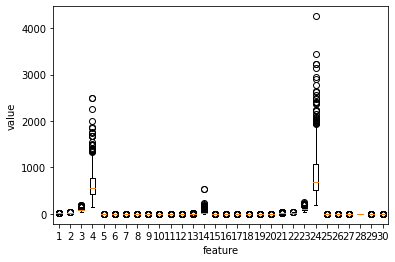

In [146]:
import matplotlib.pyplot as plt 
plt.boxplot(cancer.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [147]:
import numpy as np 
print(np.unique(cancer.target, return_counts=True))

(array([0, 1]), array([212, 357]))


In [148]:
x = cancer.data
y = cancer.target 

3. 일반화 성능을 평가하기 위해 훈련 세트와 테스트 세트로 나눈다. 
    - 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 한다. (7:3, 8:2, 9:1) 정도로 사용한다. 
    - 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한 쪽에 몰리지 않도록 골고루 섞어야 한다. 
     

In [149]:
import torch 
import torch.nn as nn 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train_torch = torch.FloatTensor(x_train)
y_train_torch = torch.FloatTensor(y_train)
x_test_torch = torch.FloatTensor(x_test)
y_test_torch = torch.FloatTensor(y_test)

In [150]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [151]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [152]:
# np.sum 함수에 대해서 
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])
print(a + b)
print(a * b)
print(np.sum(a * b))

[4 6 8]
[ 3  8 15]
26


In [153]:
# np.ones, zeros, ones_like, zeros_like
a = np.ones([5])
b = np.zeros([5])
c = np.random.randn(5)
d = np.ones_like(c)
e = np.zeros_like(c)
print(a)
print(b)
print(c)
print(d)
print(e)

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[-0.95444717  0.81436968 -1.43634714  1.65776239 -1.20869508]
[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [197]:
torch.manual_seed(2022)

class LogisticNeuron(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(30, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
    self._set_optimizer()
    self._loss() 
  
  def _set_optimizer(self):
    self.optim = torch.optim.Adam(self.model.parameters(), lr=1e-4)

  def _loss(self):
    self.criterion = nn.BCELoss()

  def _calculate_loss(self, x, y):
    loss = self.criterion(x, y)
    return loss 

  def forward(self, x):
    z = self.model(x)
    return z

  def train(self, x, y, epochs=400):
    self.w = np.ones(x.shape[1])
    self.b = 0 
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        pred_y = self.forward(x_i)
        loss = self._calculate_loss(pred_y[0], y_i)
        self.model.zero_grad() 
        self.optim.zero_grad()
        loss.backward()
        self.optim.step() 
      if (i+1) % 10 == 0:
        print("epoch {} : err = {:.9f}".format(i + 1, loss))

  def predict(self, x):
    pred = [self.forward(x_i).data.numpy()[0] for x_i in x]
    return np.array(pred) > 0.5 

In [198]:
neuron = LogisticNeuron()
neuron.train(x_train_torch, y_train_torch)
np.mean(neuron.predict(x_test_torch) == y_test)

epoch 10 : err = 0.078075849
epoch 20 : err = 0.048145872
epoch 30 : err = 0.037657801
epoch 40 : err = 0.029986938
epoch 50 : err = 0.024523614
epoch 60 : err = 0.020010389
epoch 70 : err = 0.016808314
epoch 80 : err = 0.014267353
epoch 90 : err = 0.012978005
epoch 100 : err = 0.011566939
epoch 110 : err = 0.010767465
epoch 120 : err = 0.009799958
epoch 130 : err = 0.008981867
epoch 140 : err = 0.008339692
epoch 150 : err = 0.006332078
epoch 160 : err = 0.006978306
epoch 170 : err = 0.006355891
epoch 180 : err = 0.006086596
epoch 190 : err = 0.005637593
epoch 200 : err = 0.004175846
epoch 210 : err = 0.003849455
epoch 220 : err = 0.003734999
epoch 230 : err = 0.003481541
epoch 240 : err = 0.003185453
epoch 250 : err = 0.002955688
epoch 260 : err = 0.003337283
epoch 270 : err = 0.002642603
epoch 280 : err = 0.002614516
epoch 290 : err = 0.002366838
epoch 300 : err = 0.002179373
epoch 310 : err = 0.002015355
epoch 320 : err = 0.001868980
epoch 330 : err = 0.001757019
epoch 340 : err = 0

0.9649122807017544

In [200]:
100*np.mean(neuron.predict(x_test_torch) == y_test)

96.49122807017544